In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [2]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: list[str]
    final: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    """this is the first node of the graph"""
    state['final'] = f"hi {state['name']}!"
    return state

def second_node(state: AgentState) -> AgentState:
    """this is the second node of the graph"""
    state['final'] = state['final'] + f" You are {state['age']} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    """this is the third node of the graph"""
    state['final'] = state['final'] + f" Your skills are: {', '.join(state['skills'])}"
    return state

In [7]:
graph = StateGraph(AgentState)
graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")
app = graph.compile()

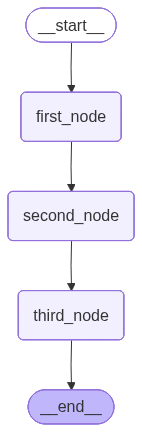

In [8]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:
results = app.invoke({"name": "bob", "age": "25", "skills": ["python", "sql", "llm"]})
print(results['final'])

hi bob! You are 25 years old! Your skills are: python, sql, llm
